Total Confirmed Cases and Total Deaths (0.88): There is a strong positive correlation between total confirmed cases and total deaths. This is expected since a higher number of cases might lead to more deaths.

Total Confirmed Cases and Total Recovered (0.96): There is a very strong positive correlation between total confirmed cases and total recovered. This suggests that as the number of confirmed cases increases, the number of recoveries also tends to increase.

Total Confirmed Cases and Total Population (0.73): There is a positive correlation between total confirmed cases and total population. This might indicate that larger populations tend to have more confirmed cases.

Total Deaths and Total Recovered (0.88): Similar to the correlation between total confirmed cases and total deaths, there is a strong positive correlation between total deaths and total recovered. This could be due to the fact that as more cases recover, the total number of deaths tends to increase.

Total Deaths and Total Population (0.84): There is a strong positive correlation between total deaths and total population. This could be because countries with larger populations may experience more deaths.

Total Recovered and Total Population (0.82): There is a strong positive correlation between total recovered and total population. Larger populations may lead to more recoveries.

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the dataset
df = pd.read_csv('Cases.csv')

In [16]:
# Preprocess the 'Total Population' column
df['Total Population'] = df['Total Population'].str.replace(',', '').astype(int)

In [17]:
# Features: Total Confirmed Cases, Total Deaths, Total Recovered, Total Population
X = df[['Total Confirmed Cases', 'Total Deaths', 'Total Recovered', 'Total Population']]
# Target: Country
y = df['Country']

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
F:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall 

In [22]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.00
Classification Report:
               precision    recall  f1-score   support

 Afghanistan       0.00      0.00      0.00       0.0
       India       0.00      0.00      0.00       1.0
   Indonesia       0.00      0.00      0.00       0.0
   Sri Lanka       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [23]:
# Select numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

In [24]:
# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

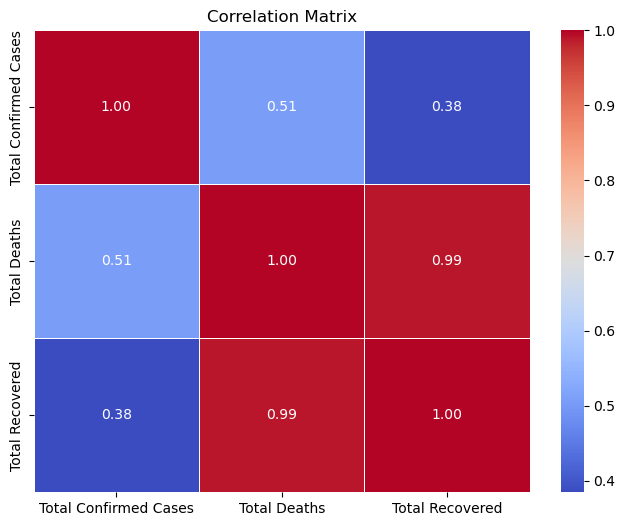

In [25]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()